# Graphical vector-autoregression
This notebook contains preliminary network analysis usig Graphical vector-autoregressive models to investigate dynamical relationships between psychopathogical symptoms (Vars1) and dimensional diagnoses (Vars2) (https://github.com/SachaEpskamp/psychonetrics#graphical-vector-autoregression for more info)

In [ ]:
library("devtools")
library("psychonetrics")
library("dplyr")
library("psych")
library("qgraph")
library("plyr")
install_github("sachaepskamp/psychonetrics")

✔  checking for file ‘/tmp/RtmpxaSkwg/remotes3e3be13bb/SachaEpskamp-psychonetrics-74dbf71/DESCRIPTION’
─  preparing ‘psychonetrics’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  installing the package to process help pages
─  saving partial Rd database (9m 11.3s)
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘psychonetrics_0.10.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
Vars1 <- c("enjoys_little", "bragadocious",
          "cant_concentrate", "obsessions",  "low_energy", "sad",
          "loud", "whines", "hyperactive", "withdrawn", "worries", "clings_to_adults",
          "bullys_others",  "demands_attention", "bad_diet", "no_guilt",
          "easily_jealous", "perfectionst", "fights", "teased", "impulsive", 
          "lying", "nervous_general", "paranoid", "anxious", "nervous_twiching",
          "not_liked", "overweight",  "doesnt_talk",
          "compulsions",  "shy", "sleeps_little", "sleeps_alot",
           "strange_ideas", "sulks",  "teases", "argues",
          "mood_flucuations", "lonley",
          "disobidient_friends", "body_aches", "easily_distracted")

Vars2 <- c("adhd_D", "aggressive_D",
          "somatic_problems_D", "social_problems_D",  "thought_disorder_D", "rule_breaking_D",
          "depress_D", "anxdisord_D", "ocd_D")

In [ ]:
require(plyr)
Data <- read.csv('../derived/task_demo_outcomes_panel.csv')
Data <- Data %>% mutate_each_(list(~scale(.) %>% as.vector), vars = Vars1)
Data$date <- mapvalues(Data$time, 
          from=c("0","1","2", "3"), 
          to=c("01012017 00:00", "01012018 00:00", "01012019 00:00","01012020 00:00"))
Data$Day <- as.Date(Data$date, tz = "Europe/Amsterdam", format="%m/%d/%Y %H:%M" )

In [ ]:
# Model, using FIML for missing data:
mod <- gvar(Data, vars = Vars1, dayvar = "Day", beta = "full", 
            omega_zeta = "full", estimator = "FIML")

In [ ]:
# Run and stepup:
mod <- mod %>% runmodel %>% prune %>% stepup(criterion = "none")

In [ ]:
temporal <- t(getmatrix(mod, "beta"))
contemporaneous <- getmatrix(mod, "omega_zeta")
Layout <- averageLayout(temporal, contemporaneous)

In [ ]:
mod

                        _                      _        _          
                       | |                    | |      (_)         
   _ __  ___ _   _  ___| |__   ___  _ __   ___| |_ _ __ _  ___ ___ 
  |  _ \/ __| | | |/ __|  _ \ / _ \|  _ \ / _ \ __|  __| |/ __/ __|
  | |_) \__ \ |_| | (__| | | | (_) | | | |  __/ |_| |  | | (__\__ \
  | .__/|___/\__, |\___|_| |_|\___/|_| |_|\___|\__|_|  |_|\___|___/
  | |         __/ |                                                
  |_|        |___/                                                 
 

General: 
	- psychonetrics version: 0.10 
	- Model last edited at: 2021-11-28 20:49:14

Sample: 
	- Number of cases: 37293 
	- Number of groups: 1 
	- Number of observed summary statistics: 189

Model: 
	- Model used: Lag-1 vector-autoregression (VAR1) 
	- Submodel used: Graphical vector-autoregression (GVAR) 
	- Number of parameters: 155

Estimation: 
	- Optimizer used: nlminb 
	- Estimator used: Full information maximum likelihood (FIML) 
	- Messa

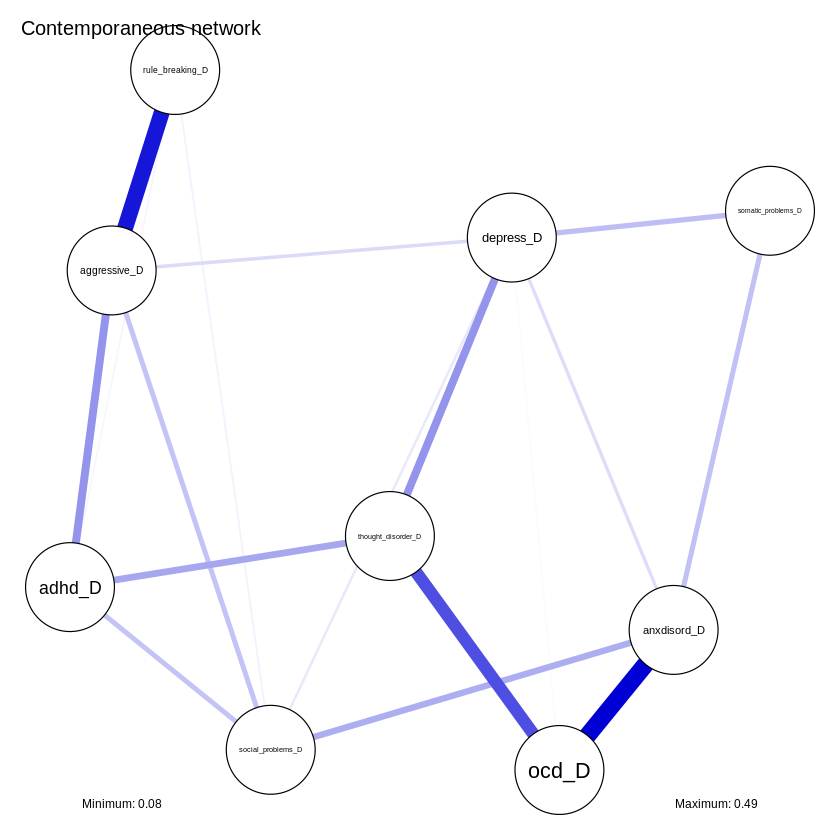

In [ ]:
qgraph(contemporaneous, labels = Vars1, theme = "colorblind",  width =100, height = 100,
       title = "Contemporaneous network",layout = Layout, minimum = 0.08, mar = c(2,2,2,2), details =TRUE, 
       vsize = 10)

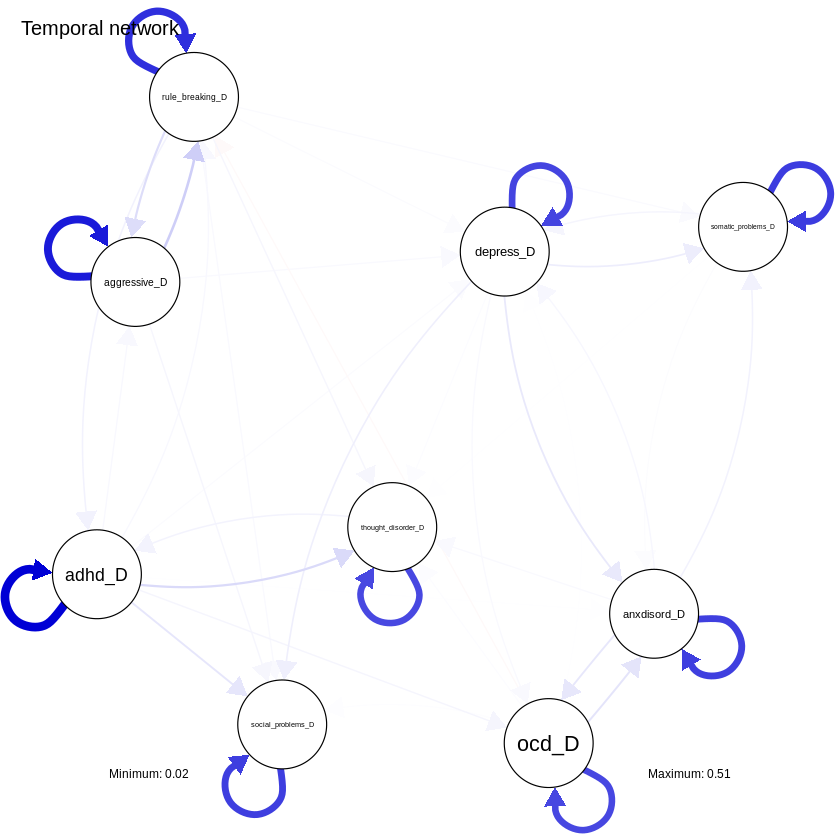

In [ ]:
qgraph(temporal, labels = Vars1, theme = "colorblind", width =100, height = 100,
       title = "Temporal network", layout=Layout, minimum = 0.02, mar = c(3,3,3,3), details =TRUE,
       vsize = 10, asize = 5)